<a href="https://colab.research.google.com/github/RogCas/SIMULACION-II/blob/main/PI%20Metodologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodología Para Valor de Pi usando Acierto y Error (metodo visto en clase)
---



### 1. Identifique las variables

Serian el numero de puntos que caen dentro del circulo, medio circulo o cuarto de circulo (acierto $N_h$ y error $N$ - $N_h$)

Veremos por que no importa como usemos el circulo  

### 2. Determine la distribución de probabilidad


|           |**Acierto**|**Error**|
|-----------|-------|----------|
|f(x)       |  $$\frac{I}{c(b-a)}  \text{   O   } \frac{N_h}{N}$$     |  $$1 - \frac{I}{c(b-a)} \text{   O   }  1- \frac{N_h}{N}$$      |
|F(x)       |  $$\frac{N_h}{N}$$ |  $$1$$        |
|Intervalos |   $$[0,\frac{N_h}{N})$$    |  $$[\frac{N_h}{N},1]$$        |

### 3. Modele las variables aleatorias

Sabemos que para construir un circulo es

El círculo con centro en el origen y radio $( r )$ tiene la ecuación $( x^2 + y^2 = r^2 )$.

Sabemos que pi siempre es el cuantos diametros caben en el perimetro sin importar cuanto valga el diametro por ende diremos que el diametro es 2 es decir el radio es 1

Caso 1


Usaremos el circulo completo

$( x^2 + y^2 = 1 )$.



Caso 2


Usaremos medio circulo


Entonces para que quede solamente $x$ despejamos y nos queda
$( \sqrt{1 - x^2}) $


$ f(x)=( \sqrt{1 - x^2}) $






Ya tenemos nuestra funcion

Ahora pongamos los limites de la funcion.

Supongamos que tiene centro en el origen (0,0) por lo tanto va de $$ -1 \text{   a   } 1$$


\begin{equation*}
\begin{aligned}
 I = \int_{-1}^1 \sqrt{1-x^2} \quad dx
\end{aligned}
\end{equation*}

Caso 3

Usaremos Cuarto de circulo



Pero si Limitaremos la funcion de 0 a 1 para fines practicos, por lo tanto tenemos un cuarto de circulo

Entonces quedaria de la siguiente manera


\begin{equation*}
\begin{aligned}
 I = \int_0^1 \sqrt{1-x^2} \quad dx
\end{aligned}
\end{equation*}

### 4. Defina el modelo del sistema y los objetivos de la simulación

Usaremos el metodo de Montecarlo Acierto y error
Usaremos 3 metodos
1. Usamos todo el circulo
2. Usamos solo medio circulo
3. Usamos solo 1 cuarto circulo


Objetivo : Obtendremos cual es el area bajo la curva del cuarto de circulo para calcular pi




Caso 1
- $\pi$ puede expresarse en términos del área de un círculo inscrito en $(-1, 1)^2$ como:
$$\frac{π}{4}= \frac{A_\bigcirc}{A_\square}$$
en donde $A_\bigcirc$ es el área del círculo y $A_\square$ es el área del cuadrado.


Caso 2 y Caso 3

Usaremos
\begin{equation*}
\begin{aligned}
 {A_\bigcirc}= π*r^2
\end{aligned}
\end{equation*}

Por ende ya que el radio es 1 lo que obtendremos al calcular el area sera exactamente el valor de π
Pero como en este caso tenemos solo un cuarto de circulo lo multiplicaremos por 4

Caso 2
$$\frac{\pi/2}{2}= \frac{A_\bigcirc}{A_\square}$$
<br>
$$\frac{\pi}{4}= \frac{A_\bigcirc}{A_\square}$$

  

Caso 3  
$$\frac{\pi/4}{1}= \frac{A_\bigcirc}{A_\square}$$
<br>
$$\frac{\pi}{4}= \frac{A_\bigcirc}{A_\square}$$

Nos damos cuenta que sin importar como tomemos el circulo siempre nos queda igual

En la simulacion

$A_\bigcirc$ son los puntos que caen dentro del círculo

$A_\square$ son los punto que caen dentro del cuadrado.
<br>
$$\frac{\pi}{4}= \frac{Puntos_\bigcirc}{Puntos\square}$$
<br>
Pero como el circulo esta dentro del cuadrado lo simplificamos
<br>
<br>
$$\frac{\pi}{4}= \frac{Puntos del circulo}{Puntos Totales}$$
Entonces
$$\pi= 4\frac{Puntos del circulo}{Puntos Totales}$$
<br>
$$\pi= 4\frac{Numero de aciertos}{Numero de simulaciones}$$

<br>


El area se calculara por el numero de puntos que caigan dentro del circulo completo , medio o cuarto de circulo
y lo dividiremos entre el numero total de intentos

<br>
$$\frac{N_h}{N}$$

In [161]:
import random
import numpy as np
import matplotlib.pyplot as plt
#plots
def graficar1(titulo,extra,x,y,titulox,tituloy): #Plot
  plt.plot(x,y)
  plt.title(titulo + str(extra))
  plt.xlabel(titulox)
  plt.ylabel(tituloy)
  plt.show()

def graficar2(titulo,x,y,titulox,tituloy): #Plot
  plt.plot(x,y)
  plt.title(titulo)
  plt.xlabel(titulox)
  plt.ylabel(tituloy)
  plt.show()

def graficar3(titulo,x,titulox,tituloy):  #histograma
  plt.hist(x)
  plt.title(titulo)
  plt.xlabel(titulox)
  plt.ylabel(tituloy)
  plt.show()

#grafico acierto y error
def grafcirculo(titulo,aproximacion,aciertosx,aciertosy,errorx,errory,a,b,alturan,alturap):
  fig=plt.figure(figsize=(7,7))
  ax=fig.add_subplot(111)
  ax.set_aspect('equal')

  circulo = plt.Circle((0, 0), 1, color='0.9', fill=True, zorder=1)
  ax.add_artist(circulo)
  ax.scatter(aciertosx,aciertosy, s=0.2, c='r', marker="o", zorder=2)
  ax.scatter(errorx,errory, s=0.2, c='b', marker="o", zorder=3)

  plt.xlim(a, b)
  plt.ylim(alturan, alturap)
  plt.title(titulo)
  plt.show()
#funcion circulo completo
#Usando el video de youtube como nos dijo en clase

#n = numero de simulaciones

def circulo1(n): #numero de simulaciones
  aciertos=0 #numero de aciertos

  aciertosx=[]
  aciertosy=[]

  errorx=[]
  errory=[]

  pi=[]
  simulaciones=[]


  for i in range(n):
    x=random.uniform(-1,1)
    y=random.uniform(-1,1)

    if (x**2+y**2<=1):
      aciertos+=1
      aciertosx.append(x)
      aciertosy.append(y)
    else:
      errorx.append(x)
      errory.append(y)

    pi.append(4*aciertos/(1+i))
    simulaciones.append(i+1)

  ##pi=4*(aciertos/n)
  ##print("\n El valor de pi usando el video de youtube (circulo completo) es : " , pi)
  ##if B:
    ##graficar(simulaciones,pi,'Número de simulaciones','Valor de $\pi$')
  return pi,simulaciones,aciertosx,aciertosy,errorx,errory





#funcion cuarto de circulo
def circulo2(n): #numero de simulaciones

  aciertos=0 #numero de aciertos

  aciertosx=[]
  aciertosy=[]

  errorx=[]
  errory=[]

  pi=[]
  simulaciones=[]

  a=0
  b=1
  c=1

  for i in range(n):

    #Lo puse asi ya que es lo mismo que a+(b-a)*U(0,1)
    x=random.uniform(a,b) #Aleatorio 1
    y=random.uniform(a,b) #Aleatorio 2

    if (np.sqrt(1-x**2)>c*y):
      aciertos+=1
      aciertosx.append(x)
      aciertosy.append(y)
    else:
      errorx.append(x)
      errory.append(y)
    pi.append((4*aciertos)/(i+1))
    simulaciones.append(i+1)
  ##pi=4*(aciertos/n)
  ##print("\n El valor de pi es usando 1/4 de circulo es : " , pi)
  return pi,simulaciones,aciertosx,aciertosy,errorx,errory







### 5. Diseñe el experimento

Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para
garantizar la convergencia del resultado.


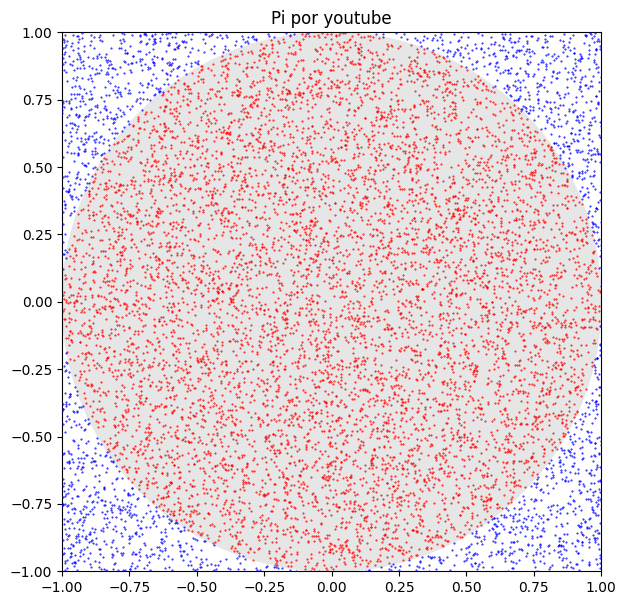

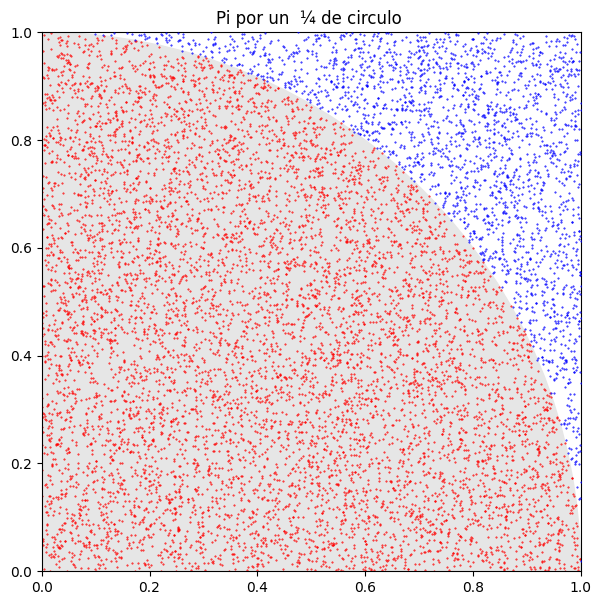

In [165]:
#numero de simulaciones
n=10000
pi1,simulaciones1,aciertosx1,aciertosy1,errorx1,errory1=circulo1(n)
pi2,simulaciones2,aciertosx2,aciertosy2,errorx2,errory2=circulo2(n)

grafcirculo("Pi por youtube",pi1[-1],aciertosx1,aciertosy1,errorx1,errory1,-1,1,-1,1)
grafcirculo("Pi por un  ¼ de circulo ",pi2[-1],aciertosx2,aciertosy2,errorx2,errory2,0,1,0,1)

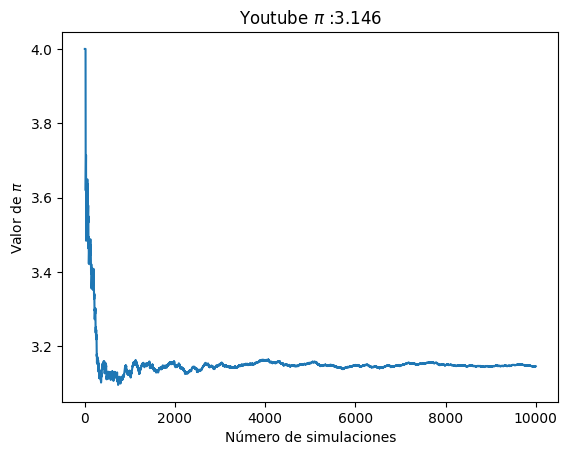

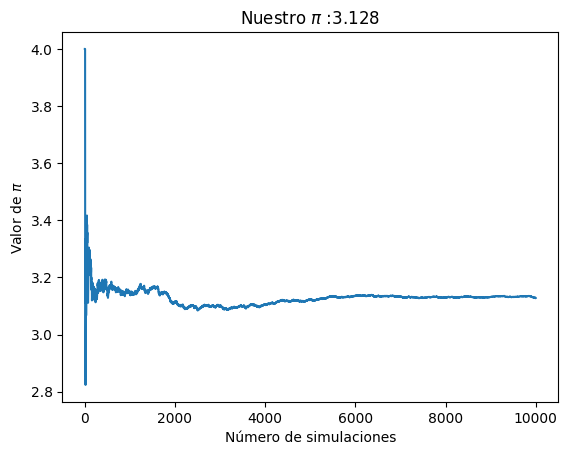

In [166]:
graficar1("Youtube $\pi$ :",pi1[-1],simulaciones1,pi1,'Número de simulaciones','Valor de $\pi$')
graficar1("Nuestro $\pi$ :",pi2[-1],simulaciones2,pi2,'Número de simulaciones','Valor de $\pi$')

### 6. Repita el experimento $n$ veces

Histograma


In [167]:
def media(m):
  npi1=[]
  npi2=[]
  for i in range(m):
    #pi1,simulaciones1,aciertosx1,aciertosy1,errorx1,errory1=circulo1(n)
    #pi2,simulaciones2,aciertosx2,aciertosy2,errorx2,errory2=circulo2(n)
    a1=circulo1(n)
    a2=circulo2(n)
    b1=a1[0]
    b2=a2[0]
    npi1.append(b1[-1])
    npi2.append(b2[-1])
  return npi1,npi2

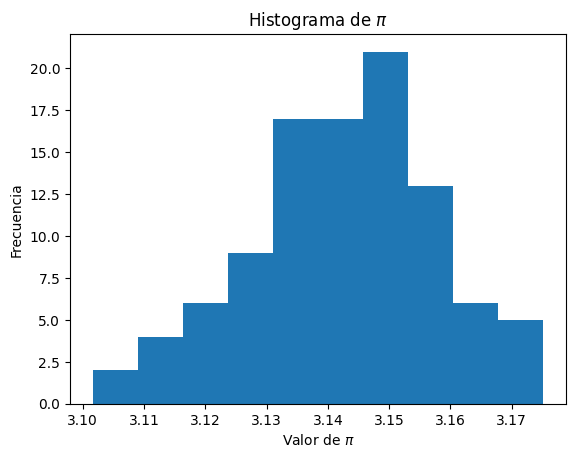

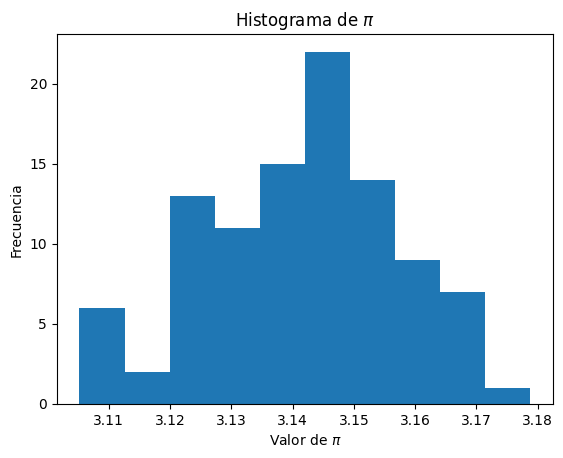

In [168]:
m=100
simulacionm1,simulacionm2=media(m)
graficar3("Histograma de $\pi$ ",simulacionm1,"Valor de $\pi$", "Frecuencia")
graficar3("Histograma de $\pi$ ",simulacionm2,"Valor de $\pi$", "Frecuencia")

### Media,Varianza y Desviacion

In [169]:
print("\n youtube",np.mean(simulacionm1), np.var(simulacionm1), np.std(simulacionm1))
print("\n nuestro",np.mean(simulacionm2), np.var(simulacionm2), np.std(simulacionm2))


 youtube 3.142436 0.00023187870399999966 0.015227563954881281

 nuestro 3.1415799999999994 0.0002562540000000003 0.01600793553210408


### Intervalo de confianza

In [170]:
import numpy as np
import scipy.stats as stats

nivel_confianza = 0.95

datos1 = np.array(simulacionm1)
media_muestral = np.mean(simulacionm1)
desviacion = np.std(simulacionm1)
tamaño_muestra = len(datos1)

# Codigo con valor critico

valor_critico = stats.norm.ppf((1 + nivel_confianza)/2)
intervalo_inf = media_muestral - (valor_critico)*(desviacion/np.sqrt(tamaño_muestra))
intervalo_sup = media_muestral + (valor_critico)*(desviacion/np.sqrt(tamaño_muestra))
print("\nIntervalo inferior youtube: ",intervalo_inf)
print("\nIntervalo superior youtube: ",intervalo_sup)

print("\n")
datos2 = np.array(simulacionm2)
media_muestral = np.mean(simulacionm2)
desviacion = np.std(simulacionm2)
tamaño_muestra = len(datos2)

# Codigo con valor critico

valor_critico = stats.norm.ppf((1 + nivel_confianza)/2)
intervalo_inf = media_muestral - (valor_critico)*(desviacion/np.sqrt(tamaño_muestra))
intervalo_sup = media_muestral + (valor_critico)*(desviacion/np.sqrt(tamaño_muestra))
print("\nIntervalo inferior nuestro: ",intervalo_inf)
print("\nIntervalo superior nuestro: ",intervalo_sup)



Intervalo inferior youtube:  3.139451452307615

Intervalo superior youtube:  3.145420547692385



Intervalo inferior nuestro:  3.138442502289023

Intervalo superior nuestro:  3.1447174977109755


In [171]:
# Codigo corto

intervalo_confianza = stats.t.interval(nivel_confianza, tamaño_muestra-1, loc=media_muestral, scale=stats.sem(datos1))
print("Intervalo de confianza youtube: ", intervalo_confianza)

intervalo_confianza = stats.t.interval(nivel_confianza, tamaño_muestra-1, loc=media_muestral, scale=stats.sem(datos2))
print("Intervalo de confianza nuestro: ", intervalo_confianza)

Intervalo de confianza youtube:  (3.1385432992937754, 3.1446167007062233)
Intervalo de confianza nuestro:  (3.1383876765739043, 3.1447723234260945)
